In [45]:
## get data and prepare train split and dev split
import pandas as pd
# get the combined dataset
df = pd.read_csv("../data/processed/BoW_aggregated_features.csv")

# get only train part of the dataset
df_train = df[df["split"] == "train"]

# get only dev part of the dataset
df_dev = df[df["split"] == "dev"]

# get the necessary columns out of df_train
X = df_train.drop(columns=["participant_id", "target_depr", "target_ptsd", "split"])
y_depr = df_train["target_depr"]

print(df_train.shape)
display(df_train.head())
print(X.index.equals(y_depr.index))

# get the necessary columns out of df_dev
X_dev = df_dev.drop(columns=["participant_id", "target_depr", "target_ptsd", "split"])
y_depr_dev = df_dev["target_depr"]

print(df_dev.shape)
display(df_dev.head())
print(X_dev.index.equals(y_depr_dev.index))

(163, 404)


,participant_id,bow_egemaps_2_mean,bow_egemaps_3_mean,bow_egemaps_4_mean,bow_egemaps_5_mean,bow_egemaps_6_mean,bow_egemaps_7_mean,bow_egemaps_8_mean,bow_egemaps_9_mean,bow_egemaps_10_mean,...,bow_mfcc_95_std,bow_mfcc_96_std,bow_mfcc_97_std,bow_mfcc_98_std,bow_mfcc_99_std,bow_mfcc_100_std,bow_mfcc_101_std,target_depr,target_ptsd,split
2,302,0.431654,0.008801,0.070662,0.003179,0.027842,0.008674,0.063036,0.172168,0.007635,...,0.021819,0.334112,0.000000,0.088473,0.099869,0.317645,0.319770,0,0,train
3,303,0.688838,1.028125,0.041777,0.000000,0.434868,0.151256,0.025126,0.557120,0.003796,...,0.258597,0.297399,0.156284,0.194139,0.262813,0.503814,0.292152,0,0,train
4,304,0.594773,0.658804,0.043229,0.000000,0.336465,0.103073,0.010107,0.303097,0.005749,...,0.191830,0.302847,0.056409,0.100500,0.180708,0.485558,0.260609,0,0,train
5,305,0.019933,0.619588,0.009948,0.003398,0.023531,0.081506,0.002844,0.306944,0.000000,...,0.142183,0.245184,0.093239,0.226964,0.249124,0.319684,0.314181,0,0,train
7,307,0.025780,1.408446,0.044388,0.000000,0.349453,0.106781,0.002917,0.133493,0.000997,...,0.243252,0.370926,0.061901,0.239680,0.292829,0.371272,0.277161,0,0,train


True
(56, 404)


,participant_id,bow_egemaps_2_mean,bow_egemaps_3_mean,bow_egemaps_4_mean,bow_egemaps_5_mean,bow_egemaps_6_mean,bow_egemaps_7_mean,bow_egemaps_8_mean,bow_egemaps_9_mean,bow_egemaps_10_mean,...,bow_mfcc_95_std,bow_mfcc_96_std,bow_mfcc_97_std,bow_mfcc_98_std,bow_mfcc_99_std,bow_mfcc_100_std,bow_mfcc_101_std,target_depr,target_ptsd,split
0,300,0.339651,0.309486,0.098401,0.000000,0.030742,0.046243,0.021366,0.221098,0.000000,...,0.095374,0.329190,0.033231,0.092826,0.099744,0.422663,0.359292,0,0,dev
1,301,0.417114,0.508682,0.048905,0.000000,0.178481,0.049159,0.104577,0.480422,0.001461,...,0.261580,0.305343,0.128106,0.235143,0.162115,0.467075,0.324784,0,0,dev
6,306,0.060895,0.935911,0.026260,0.001445,0.095571,0.065111,0.004228,0.313527,0.000000,...,0.174303,0.224284,0.081181,0.270389,0.267230,0.306523,0.264263,0,0,dev
17,317,0.901303,0.100441,0.019618,0.000000,0.016212,0.010623,0.107381,0.473388,0.017541,...,0.209779,0.311567,0.078522,0.194000,0.122217,0.546270,0.285626,0,1,dev
20,320,0.598851,0.527382,0.010727,0.000000,0.291888,0.072534,0.010969,0.328923,0.109905,...,0.231705,0.303102,0.112808,0.194180,0.228752,0.471862,0.293969,0,1,dev


True


In [46]:
import torch
import numpy as np
import random

# =========================
# REPRODUCIBILITY SETUP
# =========================
def set_seed(seed=1):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if using multi-GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(1)


In [60]:
import torch.nn as nn

def init_weights(model):
    """
    Initialize weights of linear layers using Xavier uniform initialization.
    Biases are initialized to zero.
    """
    for m in model.modules():
        if isinstance(m, nn.Linear):
            nn.init.xavier_uniform_(m.weight)
            if m.bias is not None:
                nn.init.zeros_(m.bias)


In [68]:
def train_model(final_model, optimizer, scheduler, criterion, X_tensor, y_tensor):
    torch.manual_seed(1)  # Ensure reproducibility
    final_model.train()
    optimizer.zero_grad()
    output = final_model(X_tensor).squeeze()
    loss = criterion(output, y_tensor)
    loss.backward()
    optimizer.step()
    scheduler.step(loss)

In [69]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import ParameterGrid, StratifiedKFold
from sklearn.metrics import precision_recall_curve



# =======================
# HELPER FUNCTIONS
# =======================
def create_model(input_dim, device):
    torch.manual_seed(1)  # Ensure reproducibility
    return nn.Linear(input_dim, 1).to(device)

def create_optimizer(model, lr, optimizer_type):
    if optimizer_type == "Adam":
        return torch.optim.Adam(model.parameters(), lr=lr)
    else:
        return torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

def compute_best_f2(y_true, y_proba):
    prec, rec, thr = precision_recall_curve(y_true, y_proba)
    f2_scores = (1 + 2**2) * prec * rec / ((2**2 * prec) + rec + 1e-12)
    best_idx = np.argmax(f2_scores[:-1])
    return f2_scores[best_idx], thr[best_idx]

# =======================
# GRID SEARCH WITH K-FOLD
# =======================

def grid_search(device, X_tensor, y_tensor, param_grid, kf):
    best_f2 = 0
    best_params = None
    best_model = None
    best_threshold = 0

    for params in ParameterGrid(param_grid):
        print(f"\nTesting parameters: {params}")
        fold_f2_scores = []

        for fold, (train_idx, val_idx) in enumerate(kf.split(X_tensor.cpu(), y_tensor.cpu())):
            X_train, y_train = X_tensor[train_idx], y_tensor[train_idx]
            X_val, y_val = X_tensor[val_idx], y_tensor[val_idx]

            model = create_model(X_train.shape[1], device)
            torch.manual_seed(1)  # Ensure reproducibility for each fold
            init_weights(model)
            criterion = nn.BCEWithLogitsLoss()
            optimizer = create_optimizer(model, params["lr"], params["optimizer_type"])
            torch.manual_seed(1)  # Ensure reproducibility
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
                optimizer, mode="min", factor=0.5, patience=5
            )

            # Training loop
            for epoch in range(params["epochs"]):
                train_model(model, optimizer, scheduler, criterion, X_train, y_train)

            # Evaluation
            model.eval()
            with torch.inference_mode():
                y_proba = torch.sigmoid(model(X_val)).cpu().numpy().flatten()
                y_val_np = y_val.cpu().numpy()
            
            fold_f2, threshold = compute_best_f2(y_val_np, y_proba)
            fold_f2_scores.append(fold_f2)

        avg_f2 = np.mean(fold_f2_scores)
        print(f"Average F2 across folds: {avg_f2:.4f}")

        if avg_f2 > best_f2:
            best_f2 = avg_f2
            best_params = params
            best_model = model  # last fold model; retrain on full set if needed
            best_threshold = threshold
            print(f"→ New best F2={best_f2:.4f} at threshold={best_threshold:.3f}")

    return best_model, best_params, best_f2, best_threshold


In [70]:
# =======================
# DEVICE & TENSOR SETUP
# =======================

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_tensor = torch.tensor(X.values, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y_depr.values, dtype=torch.float32).to(device)

# =======================
# PARAM GRID & K-FOLD
# =======================
param_grid = {
    "lr": [0.01, 0.001],
    "optimizer_type": ["Adam", "SGD"],
    "epochs": [10, 20, 30, 40]
}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

best_model, best_params, best_f2, best_threshold = grid_search(device, X_tensor, y_tensor, param_grid, kf)


Testing parameters: {'epochs': 10, 'lr': 0.01, 'optimizer_type': 'Adam'}
Average F2 across folds: 0.6929
→ New best F2=0.6929 at threshold=0.206

Testing parameters: {'epochs': 10, 'lr': 0.01, 'optimizer_type': 'SGD'}
Average F2 across folds: 0.6340

Testing parameters: {'epochs': 10, 'lr': 0.001, 'optimizer_type': 'Adam'}
Average F2 across folds: 0.6442

Testing parameters: {'epochs': 10, 'lr': 0.001, 'optimizer_type': 'SGD'}
Average F2 across folds: 0.6323

Testing parameters: {'epochs': 20, 'lr': 0.01, 'optimizer_type': 'Adam'}
Average F2 across folds: 0.6926

Testing parameters: {'epochs': 20, 'lr': 0.01, 'optimizer_type': 'SGD'}
Average F2 across folds: 0.6418

Testing parameters: {'epochs': 20, 'lr': 0.001, 'optimizer_type': 'Adam'}
Average F2 across folds: 0.6602

Testing parameters: {'epochs': 20, 'lr': 0.001, 'optimizer_type': 'SGD'}
Average F2 across folds: 0.6367

Testing parameters: {'epochs': 30, 'lr': 0.01, 'optimizer_type': 'Adam'}
Average F2 across folds: 0.7042
→ New 

In [71]:
# =======================
# TRAIN FINAL MODEL ON FULL TRAINING SET
# =======================
torch.manual_seed(1)  # Ensure reproducibility
final_model = nn.Linear(X_tensor.shape[1], 1).to(device)
criterion = nn.BCEWithLogitsLoss()

# Optimizer
if best_params["optimizer_type"] == "Adam":
    optimizer = torch.optim.Adam(final_model.parameters(), lr=best_params["lr"])
else:
    optimizer = torch.optim.SGD(final_model.parameters(), lr=best_params["lr"], momentum=0.9)

torch.manual_seed(1)  # Ensure reproducibility
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.5, patience=5, verbose=False
)

# Training loop
for epoch in range(best_params["epochs"]):
    train_model(final_model, optimizer, scheduler, criterion, X_tensor, y_tensor)

# =======================
# EVALUATE ON DEV SET
# =======================
X_dev_tensor = torch.tensor(X_dev.values, dtype=torch.float32).to(device)
y_dev_tensor = torch.tensor(y_depr_dev.values, dtype=torch.float32).to(device)

final_model.eval()
with torch.no_grad():
    y_dev_proba = torch.sigmoid(final_model(X_dev_tensor)).cpu().numpy().flatten()
    y_dev_np = y_dev_tensor.cpu().numpy()

from sklearn.metrics import precision_recall_curve
prec, rec, thr = precision_recall_curve(y_dev_np, y_dev_proba)
f2_scores = (1 + 2**2) * prec * rec / ((2**2 * prec) + rec + 1e-12)
best_idx = np.argmax(f2_scores[:-1])
best_threshold = thr[best_idx]
best_f2_dev = f2_scores[best_idx]

print(f"Final model F2 on dev set: {best_f2_dev:.4f} at threshold={best_threshold:.3f} "
      f"(P={prec[best_idx]:.3f}, R={rec[best_idx]:.3f})")


Final model F2 on dev set: 0.6250 at threshold=0.245 (P=0.312, R=0.833)


c:\Users\ninas\anaconda3\envs\etasp_env\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


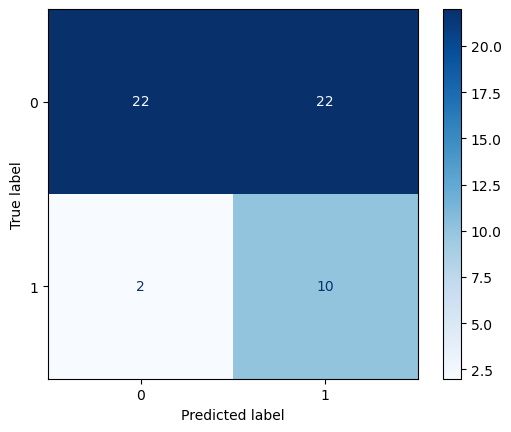

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Apply the threshold to get binary predictions
y_dev_pred = (y_dev_proba >= best_threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_dev_np, y_dev_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
